In [ ]:
#importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
## check version of Tensorflow ans keras
print (f"Tensorflow Version {tf.__version__}")
print (f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


In [ ]:
os.getcwd()

'/content'

# Creating a simple classifier using keras on MNIST data

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train_full[0].shape

(28, 28)

In [ ]:
print(f"data type of X_train_full : {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full : uint8,
 shape of X_train_full: (60000, 28, 28)


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing t by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [ ]:
# Train 55000
# Test 10000
# Val 5000

In [ ]:
len(X_train_full[5000:])

55000

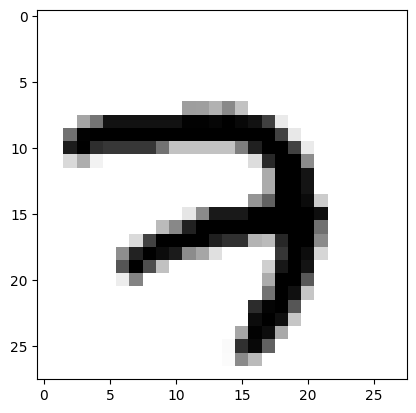

In [ ]:
# Lets view some data
plt.imshow(X_train[0], cmap= 'binary')
plt.show()

<Axes: >

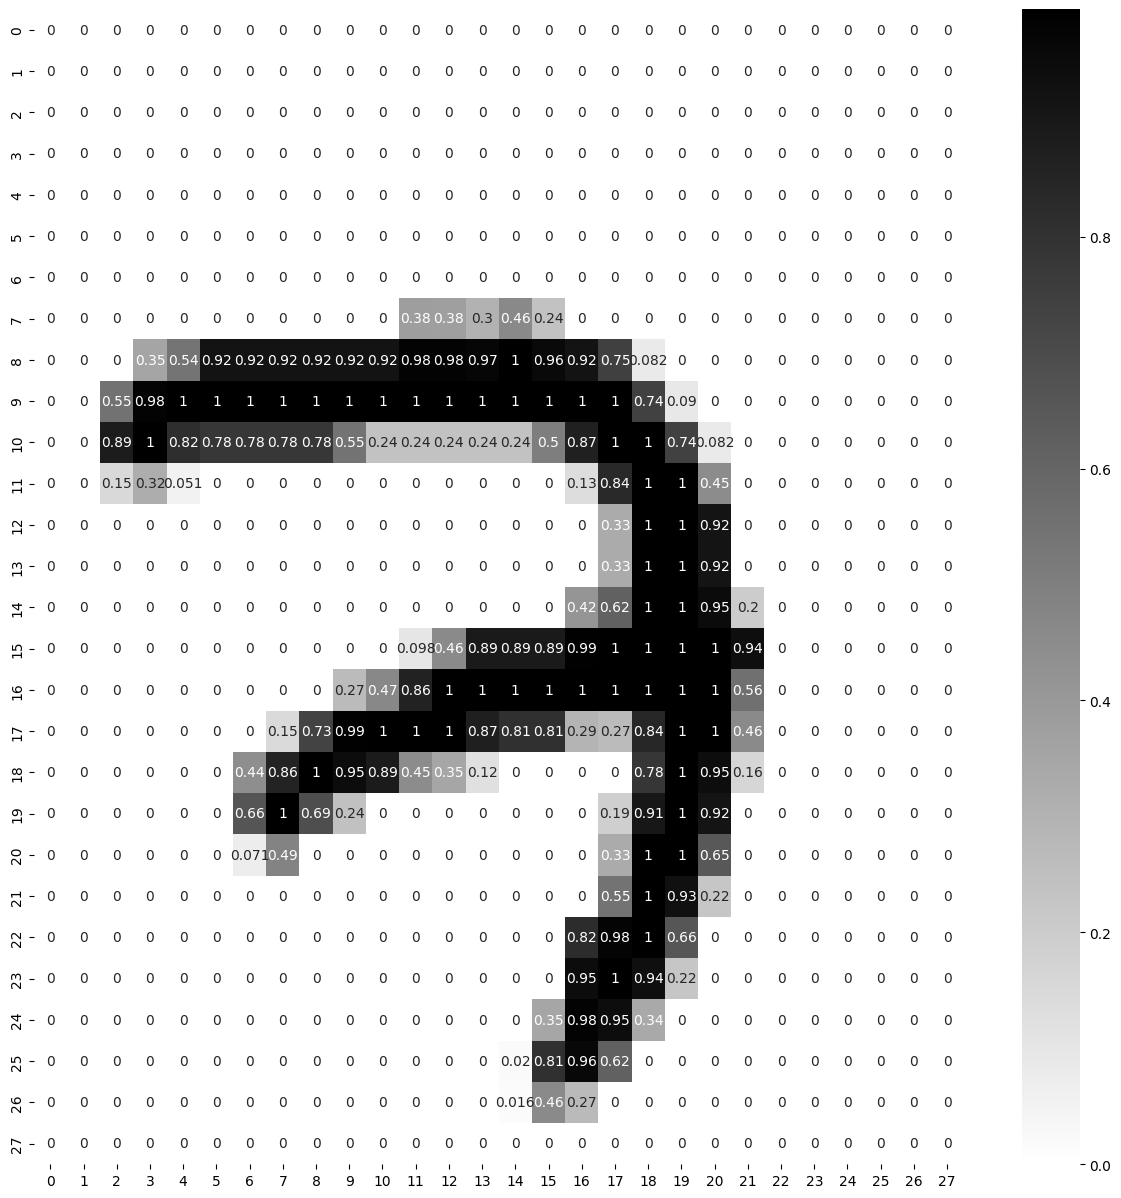

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot = True, cmap = "binary")

In [ ]:
28*28

784

In [ ]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name='inputLayer'),
          tf.keras.layers.Dense(300, activation="relu", name = "hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name = "hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax",name = "outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
#METHOD-2

In [ ]:
# from keras.models import Squential
# from keras.layers import Dense, Flatten

# # define the model
# model = Sequential()
# model.add(Dense(units=64, activation='relu',input_dim=100))
# model.add(Dense(units=10, activation='softmax))

In [ ]:
model_clf.layers

In [ ]:
300*100+100

30100

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# firstlayer * secondLayer + bais
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [ ]:
# Total parameter to be trained
sum((235500,30100,1010))

266610

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
hidden1.get_weights()[0].shape

(784, 300)

In [ ]:
hidden1.get_weights()[1].shape

(300,)

In [ ]:
weights, baises = hidden1.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
print("shape\n", weights.shape, "/\n")
weights

shape
 (784, 300) /



array([[ 0.02000842,  0.0701976 , -0.03268407, ..., -0.04702868,
         0.03596499, -0.03689899],
       [-0.02510604,  0.05853161, -0.02903397, ..., -0.0549189 ,
         0.07395169,  0.01075199],
       [-0.03471765,  0.06699733,  0.04865252, ..., -0.00498491,
         0.00864905,  0.06481615],
       ...,
       [ 0.04303413,  0.06095468,  0.00260358, ..., -0.00799956,
        -0.04691137,  0.06361437],
       [ 0.03242365, -0.02939827, -0.02244417, ...,  0.02938081,
        -0.07063084, -0.00933661],
       [ 0.06306741,  0.02401008, -0.0478549 , ...,  0.04310279,
        -0.03848742,  0.00673722]], dtype=float32)

In [ ]:
print("shape\n", baises.shape)
baises

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy' # use => tf.losses.sparse_categorical_crossentropy
OPTIMISER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMISER,
                  metrics=METRICS)

In [ ]:
# training
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                        validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6040 - accuracy: 0.8445 - val_loss: 0.3163 - val_accuracy: 0.9108
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2931 - accuracy: 0.9168 - val_loss: 0.2443 - val_accuracy: 0.9316
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2423 - accuracy: 0.9305 - val_loss: 0.2191 - val_accuracy: 0.9396
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2067 - accuracy: 0.9407 - val_loss: 0.1794 - val_accuracy: 0.9500
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1816 - accuracy: 0.9479 - val_loss: 0.1619 - val_accuracy: 0.9560
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1610 - accuracy: 0.9544 - val_loss: 0.1480 - val_accuracy: 0.9594
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1444 - accuracy: 0.9586 - val_loss: 0.1361 - val_accuracy:

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0   0.603954  0.844491  0.316328        0.9108
1   0.293066  0.916764  0.244331        0.9316
2   0.242251  0.930545  0.219135        0.9396
3   0.206712  0.940673  0.179435        0.9500
4   0.181649  0.947927  0.161937        0.9560
5   0.160977  0.954418  0.148025        0.9594
6   0.144428  0.958636  0.136120        0.9630
7   0.130524  0.962909  0.123089        0.9656
8   0.119211  0.966036  0.115687        0.9674
9   0.109487  0.968873  0.107727        0.9710
10  0.100701  0.970982  0.104073        0.9714
11  0.093516  0.973782  0.097731        0.9724
12  0.086391  0.976073  0.093512        0.9728
13  0.080513  0.977673  0.089595        0.9744
14  0.074904  0.979109  0.085846        0.9758
15  0.069951  0.981036  0.082987        0.9758
16  0.065461  0.982018  0.079869        0.9778
17  0.060857  0.983273  0.077862        0.9776
18  0.057453  0.984982  0.075899        0.9780
19  0.053747  0.985073  0.078247        0.9760
20  0.050613  0.986400  0.072491        0.9806
21  0.047706  0.987000  0.071005        0.9800
22  0.044800  0.988018  0.070051        0.9796
23  0.042256  0.988873  0.069843        0.9806
24  0.039949  0.989382  0.068389        0.9804
25  0.037336  0.990564  0.072233        0.9792
26  0.035466  0.991182  0.068845        0.9804
27  0.033373  0.991800  0.068159        0.9806
28  0.031569  0.992145  0.068161        0.9794
29  0.029959  0.993018  0.066906        0.9810

<Axes: >

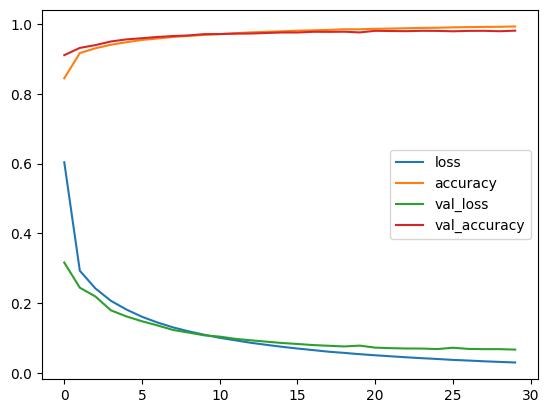

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0670 - accuracy: 0.9796


[0.06695154309272766, 0.9796000123023987]

SAMPLE CHECK- TEST DATA

In [ ]:
x_new = X_test[:3]
# x_new

In [ ]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

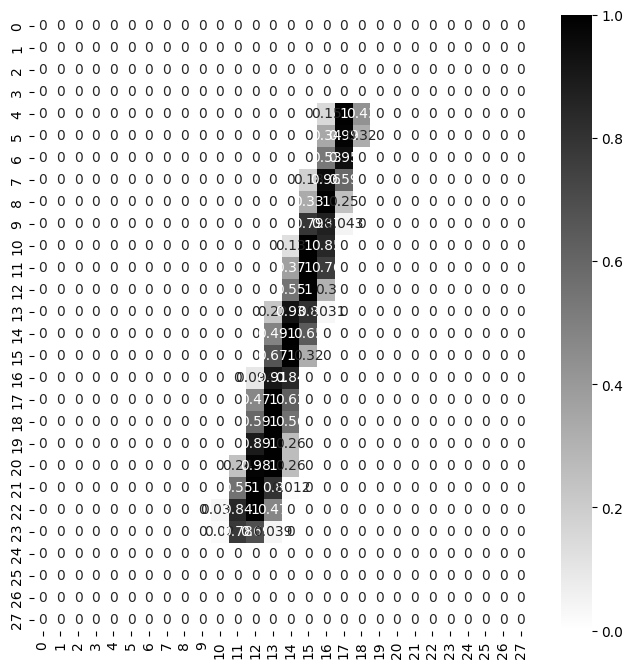

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[2], annot=True, cmap="binary")

In [ ]:
y_prob = model_clf.predict(x_new)
y_prob.round(2)

1/1 [==============================] - 0s 76ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_prob

array([[5.1579070e-07, 2.9902648e-07, 6.2081012e-06, 1.1852087e-04,
        1.0760103e-08, 3.6113158e-07, 1.4137799e-11, 9.9986744e-01,
        3.7339032e-06, 2.7914057e-06],
       [8.9203138e-07, 9.0620510e-05, 9.9988389e-01, 1.3110819e-05,
        2.2077587e-10, 1.2743546e-07, 2.7100327e-06, 1.3553844e-11,
        8.7346461e-06, 1.9480112e-12],
       [4.9745286e-06, 9.9683666e-01, 1.2358562e-04, 1.8480854e-05,
        3.6415365e-04, 3.6689617e-05, 2.4260339e-04, 6.4381602e-04,
        1.7017390e-03, 2.7256621e-05]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob, axis = -1)

In [ ]:
y_pred

array([7, 2, 1])

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

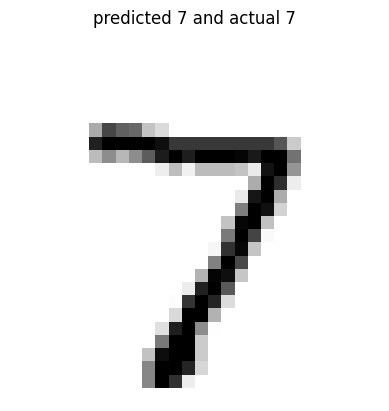

###################


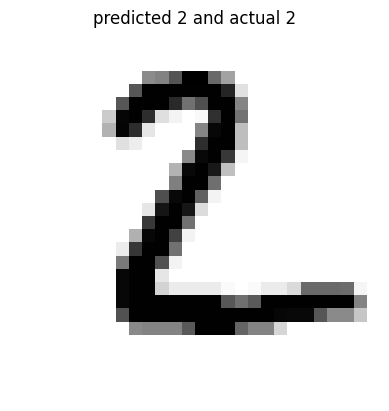

###################


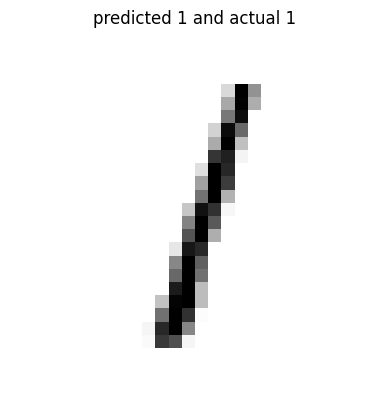

###################


In [ ]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"predicted {pred} and actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("###################")